In [84]:
import json
import math
from matplotlib import pyplot as plt
from pydantic import BaseModel, StrictBool, StrictInt, StrictStr, StrictFloat, ValidationError

In [85]:
class CameraData(BaseModel):
    hasLeft: StrictBool
    hasRight: StrictBool
    leftDistance: StrictInt
    regionsCount: StrictInt
    regionsListSize: StrictStr
    unchangedLeft: StrictBool
    unchangedRight: StrictBool

class MotorData(BaseModel):
    leftSpeed: StrictInt
    rightSpeed: StrictInt

class Vec3(BaseModel):
    x: StrictInt
    y: StrictInt
    z: StrictInt

class SensorData(BaseModel):
    accel: Vec3
    gyro: Vec3
    mag: Vec3

class SteerData(BaseModel):
    angle: StrictFloat
    servoPosition: StrictInt

class Data(BaseModel):
    camera: CameraData
    mode: StrictInt
    motor: MotorData
    sensor: SensorData
    steer: SteerData
    timestamp: StrictInt

class Record(BaseModel):
    data: Data
    time: StrictInt

In [86]:
class DataPlotter:
    DATA_FOLDER = '../Data'

    def __init__(self, filename: str) -> None:
        self.data: list[Data]

        with open(f'{self.DATA_FOLDER}/{filename}') as fd:
            data = json.load(fd)
        try:
            self.data = [Record.model_validate(d).data for d in data]
        except ValidationError:
            self.data = [Data.model_validate(d) for d in data]
            
        a_k = 4
        g_k = 0.03125
        m_k = 1200
        g = 9.8
        a_max = 8191
        m_max = 32767

        self.left_speed = [d.motor.leftSpeed for d in self.data]
        self.right_speed = [d.motor.rightSpeed for d in self.data]
        self.servo_position = [d.steer.servoPosition for d in self.data]
        self.accel_x = [(d.sensor.accel.x / a_max) * a_k * g for d in self.data]
        self.accel_y = [(d.sensor.accel.y / a_max) * a_k * g for d in self.data]
        self.accel_z = [(d.sensor.accel.z / a_max) * a_k * g for d in self.data]
        self.mag_x = [d.sensor.mag.x * (m_k / m_max)  for d in self.data]
        self.mag_y = [d.sensor.mag.y * (m_k / m_max) for d in self.data]
        self.mag_z = [d.sensor.mag.z * (m_k / m_max) for d in self.data]
        self.gyro_x = [d.sensor.gyro.x * g_k * math.pi / 180 for d in self.data]
        self.gyro_y = [d.sensor.gyro.y * g_k * math.pi / 180 for d in self.data]
        self.gyro_z = [d.sensor.gyro.z * g_k * math.pi / 180 for d in self.data]

    def __len__(self) -> int:
        return len(self.data)

    def plot_all(self):
        _, axs = plt.subplots(4, 3, figsize=(15, 10))
        axs_flatten = axs.flatten()

        axs_flatten[0].plot(self.left_speed)
        axs_flatten[0].set_title('Left Speed')
        axs_flatten[1].plot(self.right_speed)
        axs_flatten[1].set_title('Right Speed')
        axs_flatten[2].plot(self.servo_position)
        axs_flatten[2].set_title('Servo Position')
        axs_flatten[3].plot(self.accel_x)
        axs_flatten[3].set_title('Accel X')
        axs_flatten[3].set_ylabel('m/s^2')
        axs_flatten[4].plot(self.accel_y)
        axs_flatten[4].set_title('Accel Y')
        axs_flatten[4].set_ylabel('m/s^2')
        axs_flatten[5].plot(self.accel_z)
        axs_flatten[5].set_title('Accel Z')
        axs_flatten[5].set_ylabel('m/s^2')
        axs_flatten[6].plot(self.gyro_x)
        axs_flatten[6].set_title('Gyro X')
        axs_flatten[6].set_ylabel('rad/s')
        axs_flatten[7].plot(self.gyro_y)
        axs_flatten[7].set_title('Gyro Y')
        axs_flatten[7].set_ylabel('rad/s')
        axs_flatten[8].plot(self.gyro_z)
        axs_flatten[8].set_title('Gyro Z')
        axs_flatten[8].set_ylabel('μT')
        axs_flatten[9].plot(self.mag_x)
        axs_flatten[9].set_title('Mag X')
        axs_flatten[9].set_ylabel('μT')
        axs_flatten[10].plot(self.mag_y)
        axs_flatten[10].set_title('Mag Y')
        axs_flatten[10].set_ylabel('μT')
        axs_flatten[11].plot(self.mag_z)
        axs_flatten[11].set_title('Mag Z')
        axs_flatten[11].set_ylabel('μT')
        
        for ax in axs_flatten:
            ax.set_xticklabels([])

        plt.tight_layout()
        plt.show()


In [87]:
no_filter = DataPlotter('NoFilter.json')

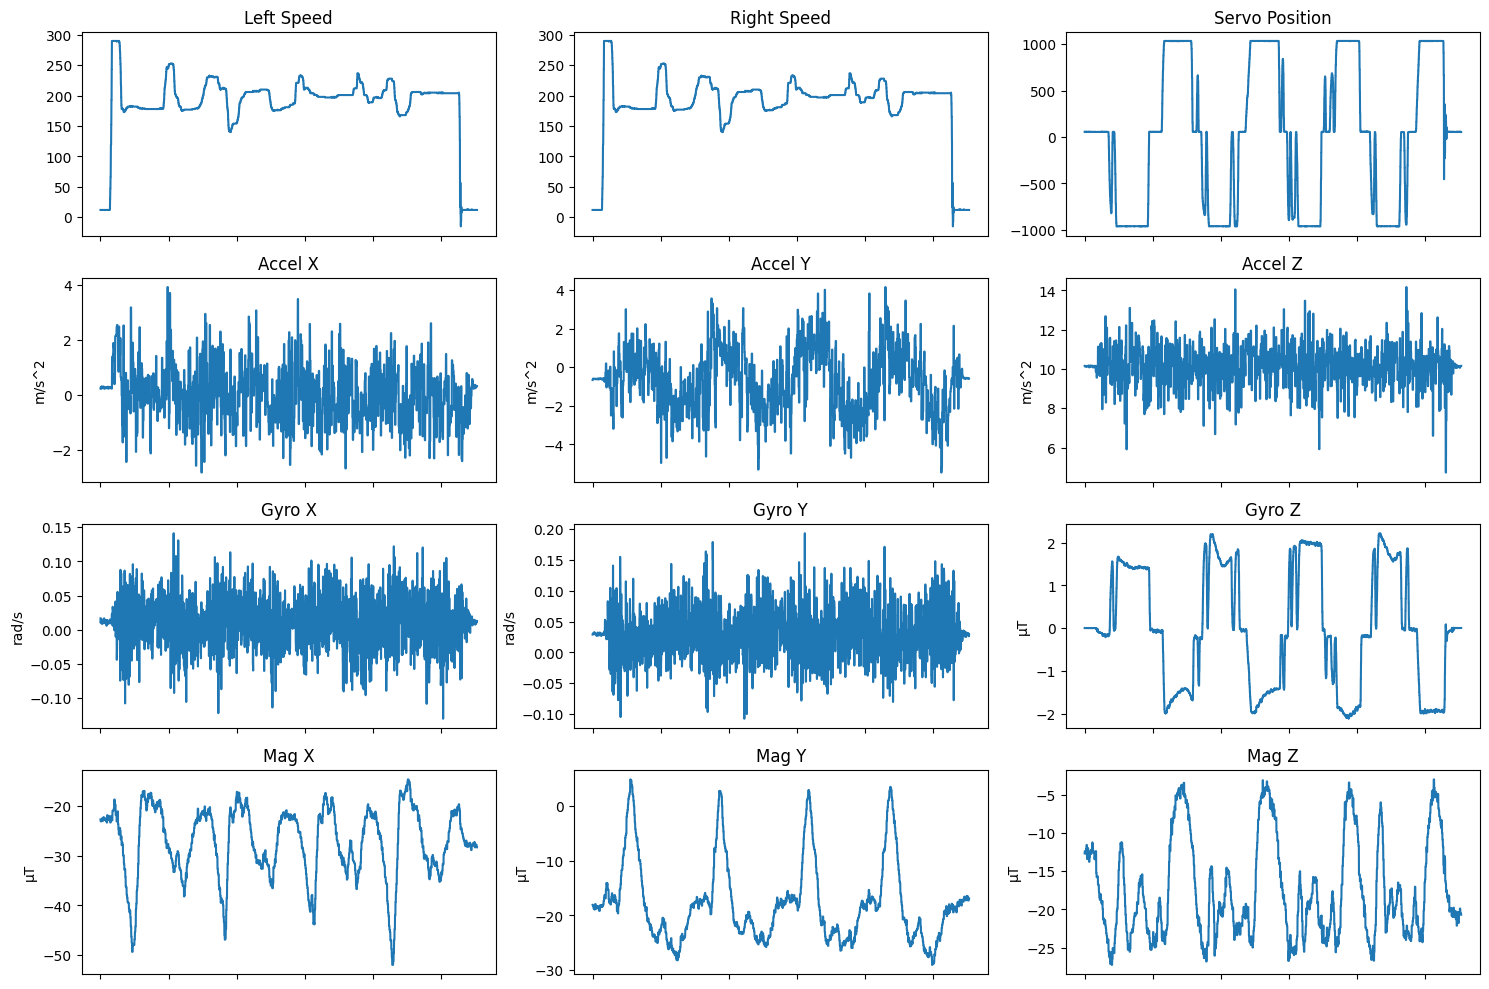

In [88]:
no_filter.plot_all()

In [89]:
moving_average = DataPlotter('MovingAverage.json')

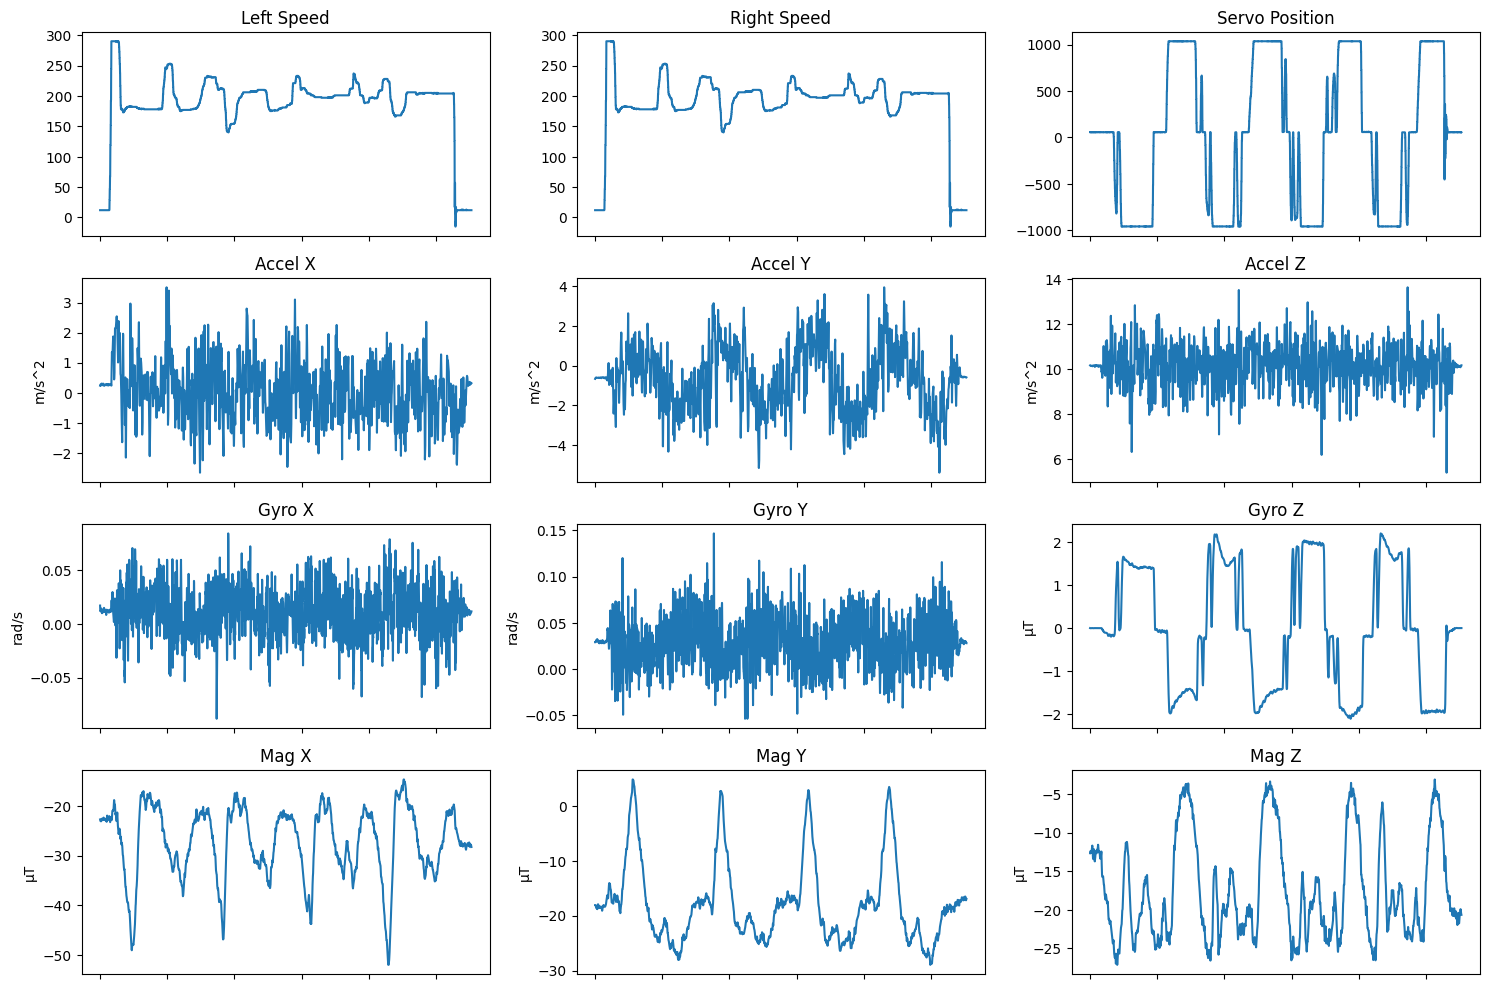

In [90]:
moving_average.plot_all()

In [91]:
single_pole = DataPlotter('SinglePole.json')

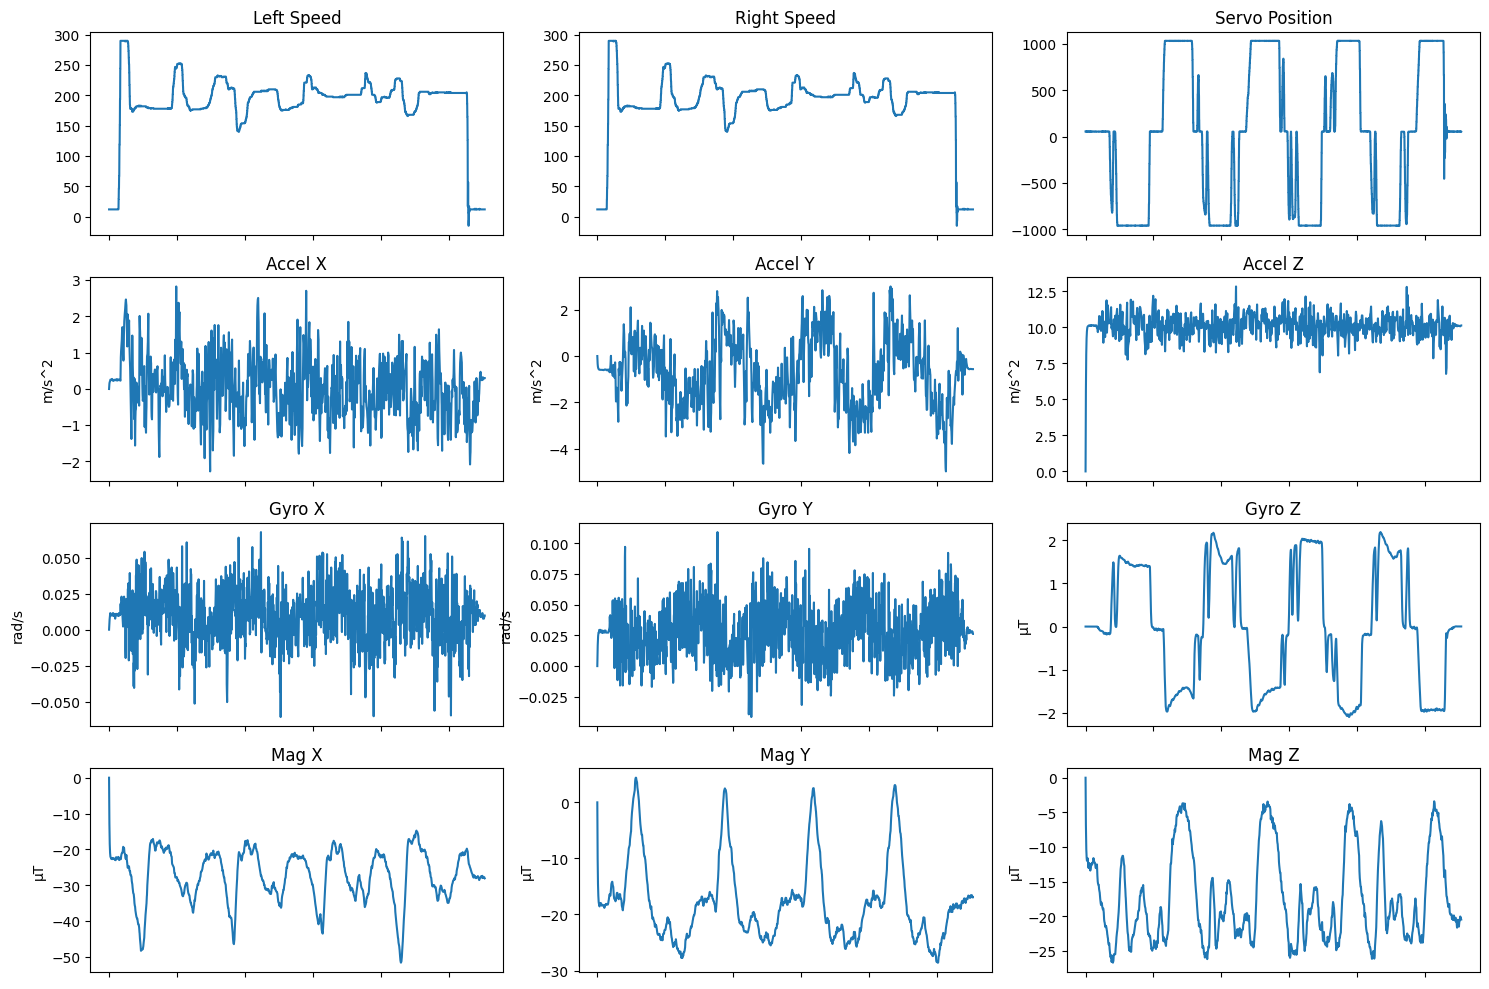

In [92]:
single_pole.plot_all()

In [93]:
four_stage = DataPlotter('FourStage.json')

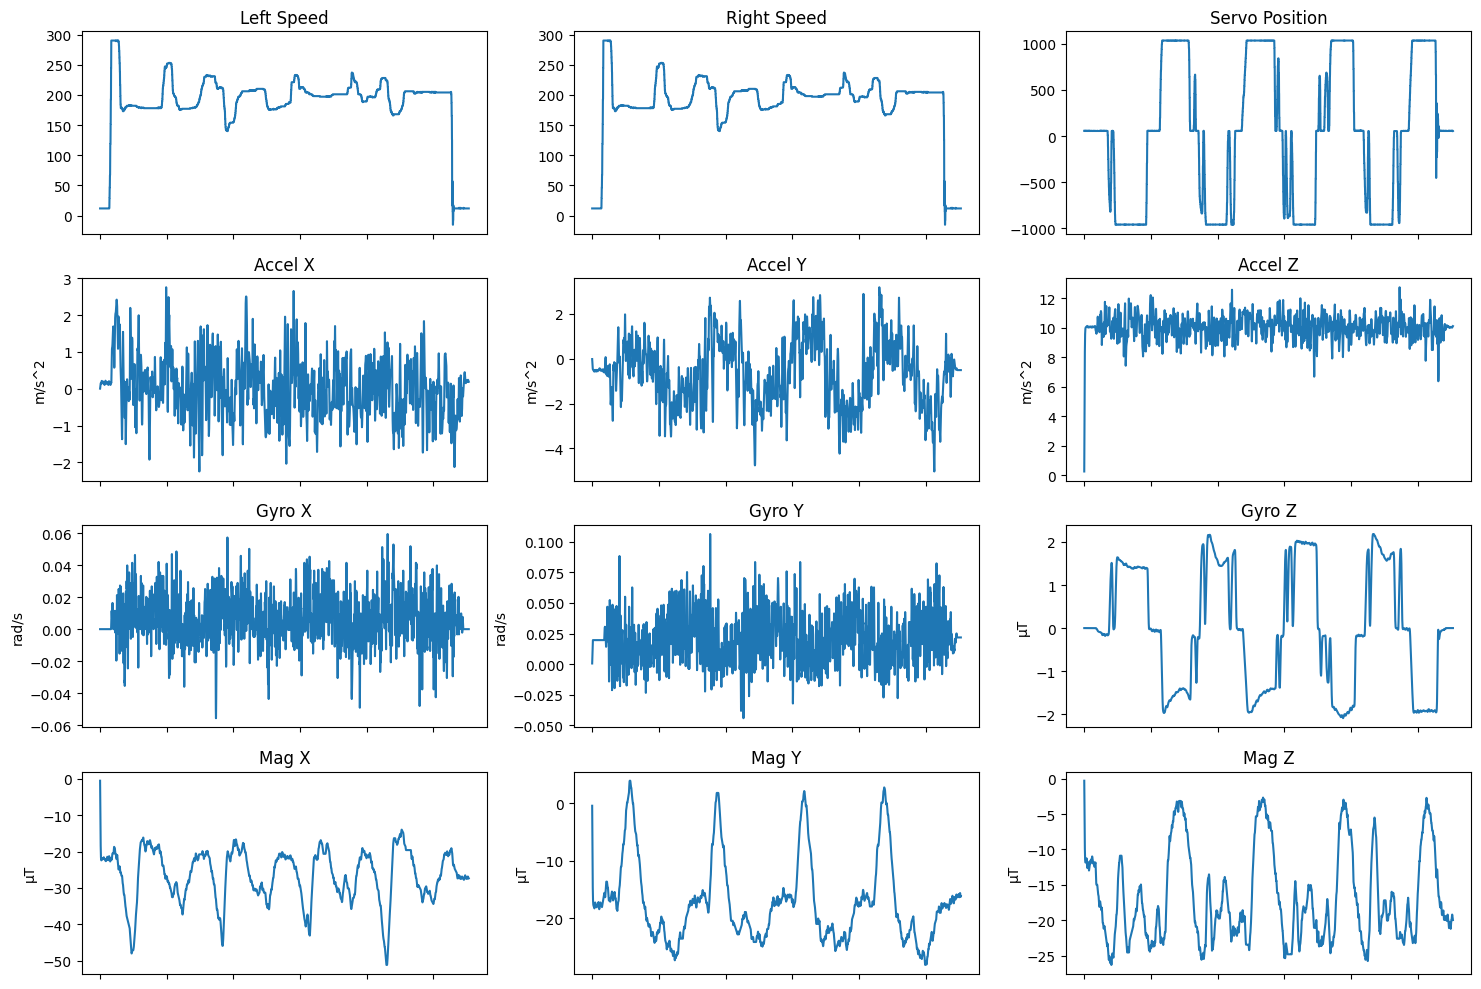

In [94]:
four_stage.plot_all()

In [95]:
chebyshev = DataPlotter('Chebyshev2.json')

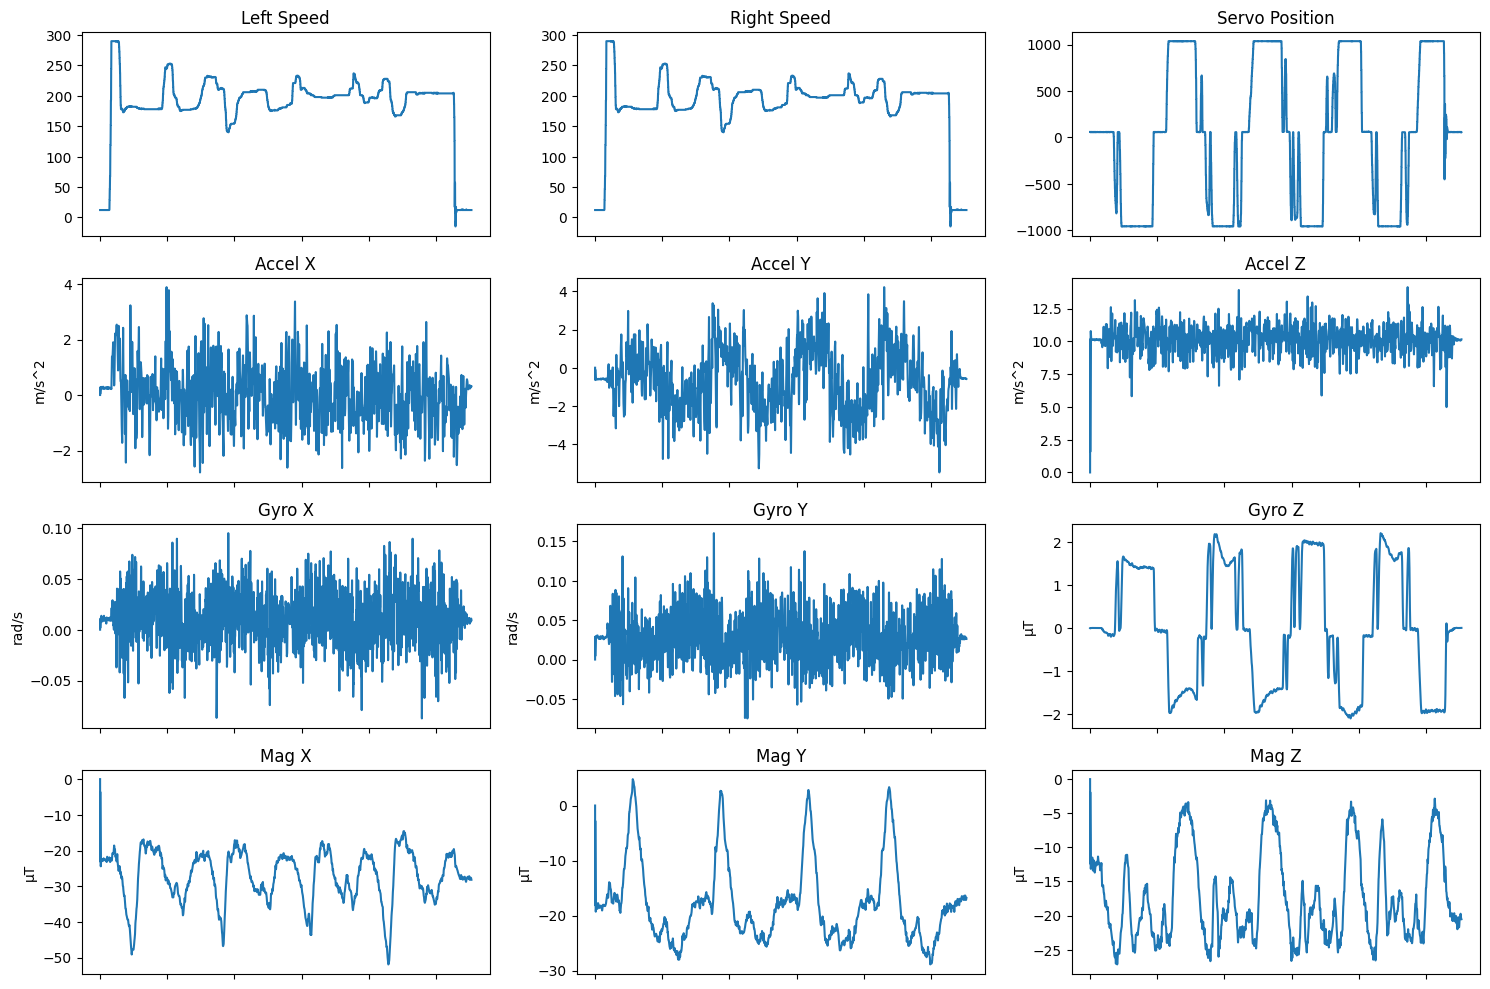

In [96]:
chebyshev.plot_all()